# 20210430 Initial Analysis

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats


### Edit Me ###
from imaka.reduce.nights import reduce_2021_04_30 as redu
night = '20210430'
fld = 'Fld2'
###############

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import warnings
warnings.filterwarnings('ignore')

## Real time plots

In [4]:
# pick a file based on key
key = 'LS_bin1'
i = 2
#####
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.200"


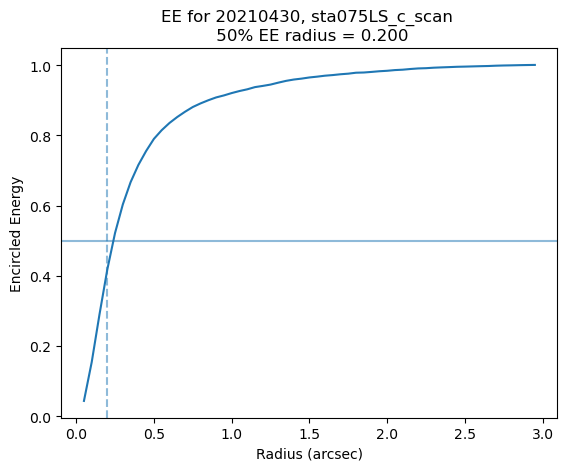

In [7]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

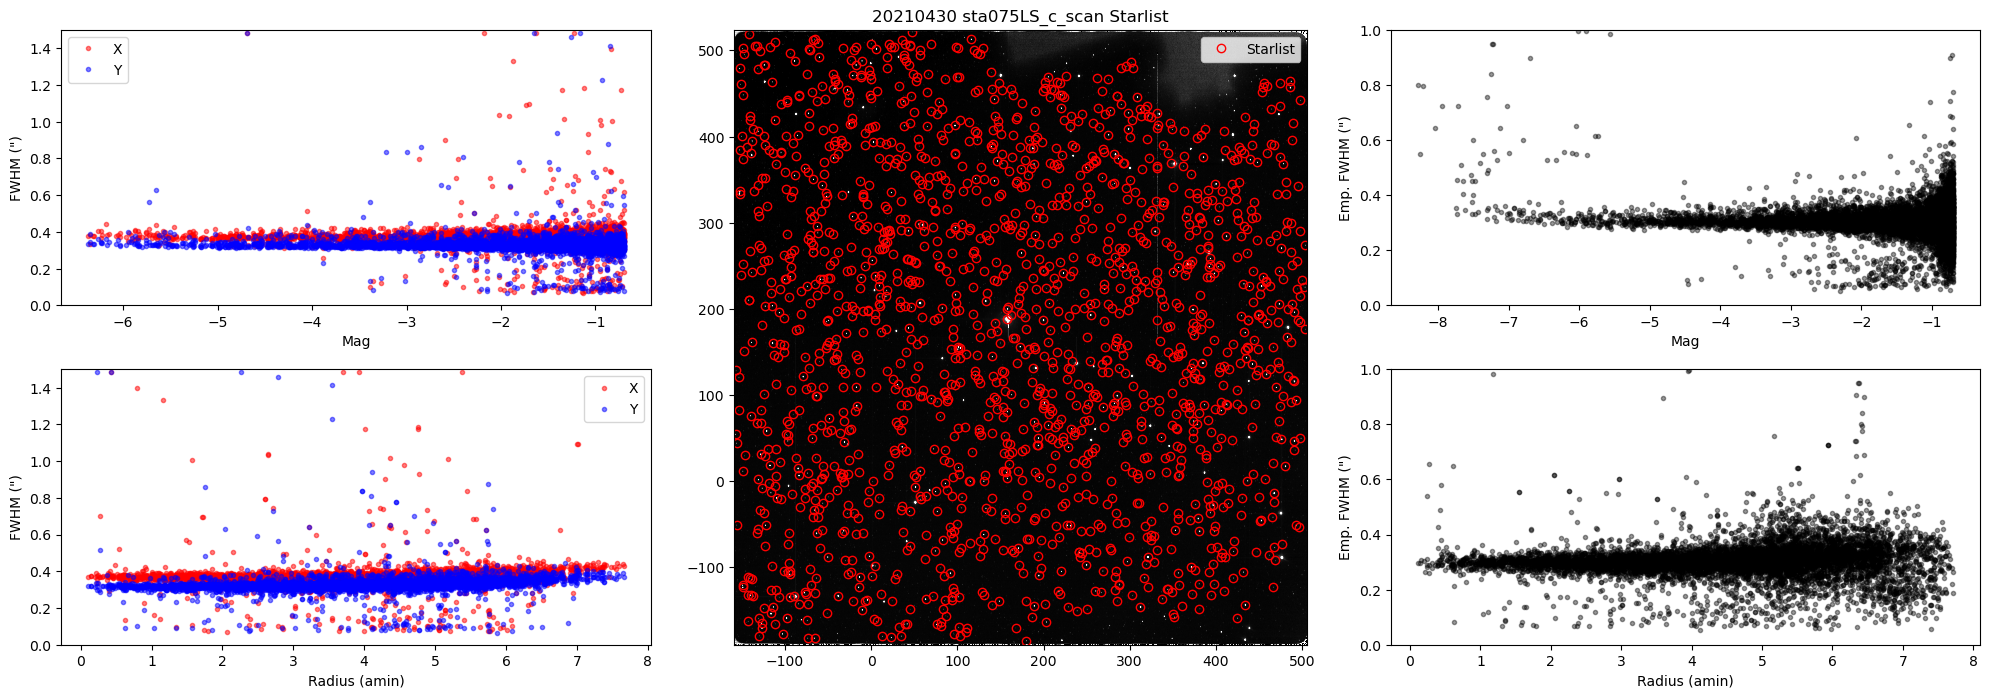

x: fwhm_x_avg = 0.37" fwhm_x_med = 0.37" fwhm_x_std = 0.02"
x: fwhm_x_avg = 0.37" fwhm_x_med = 0.37" fwhm_x_std = 0.02"


In [9]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

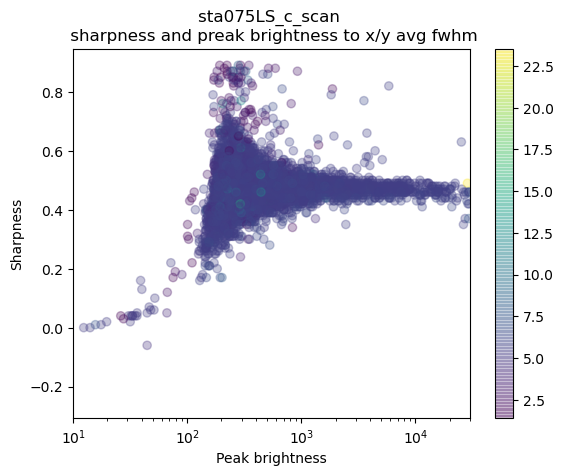

In [14]:
stars = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars.txt', format='ascii')
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

Play with a star list and look at trends in FWHM, etc. 

## Night Long Stats

In [11]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz.fits')

In [21]:
# stats by star 
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_bin1_mdp.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open_mdp.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stats/stats_open_mdp.fits'

## Night Summary Plots

In [2]:
suffixes = list(redu.dict_suffix.keys())
#suffixes = ['docz', 'open']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

NameError: name 'redu' is not defined

# Time Variation w/MASS-DIMM

In [4]:
open_file = stats_dir + "stats_open_mdp.fits"
closed_file2 = stats_dir + "stats_LS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed (LS)", plots_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stats/stats_open_mdp.fits'

In [5]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_docz_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, docz", plots_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stats/stats_open_mdp.fits'

# Aggregate Plots

['open', 'LS', 'docz', 'doczskycl', 'z10glao', 'z10scao']


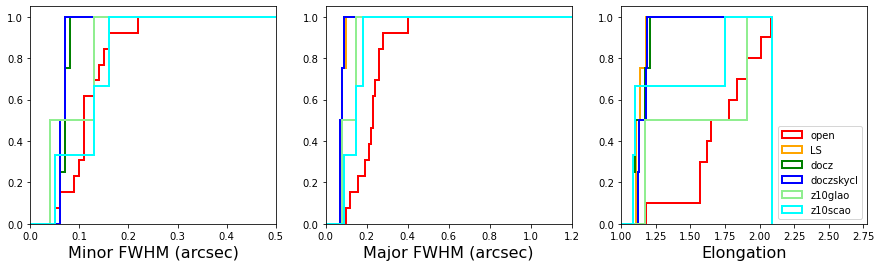

In [17]:
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(suffixes)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

# Field Variability

In [18]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Single file. closed loop

sta075LS_c_scan
Median FWHM           = 0.278"
Median FWHM (clipped) = 0.278"
Mean FWHM             = 0.365"
Mean FWHM (clipped)   = 0.279"
Stddev FWHM           = 1.141"
Stddev FWHM (clipped) = 0.022"


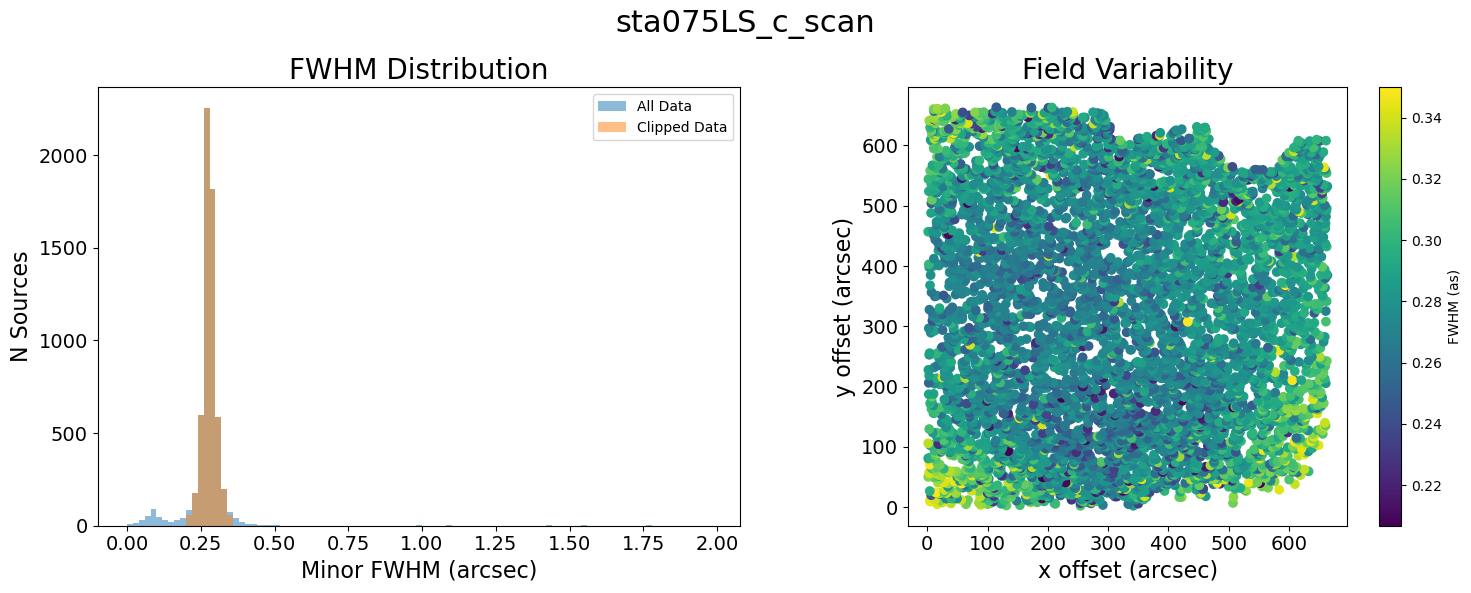

In [15]:
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

In [2]:
img_file = stack_dir + 'fld2_stack__o.fits' 
starlist = stack_dir + 'fld2_stack__o_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, "Open Loop")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stacks/fld2_stack__o_stars_stats_mdp.fits'

### Closed (LS)

In [3]:
img_file = stack_dir + 'fld2_stack_LS_c.fits' 
starlist = stack_dir + 'fld2_stack_LS_c_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, "Closed (LS)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210430/sta/reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits'

### Closed (docz2)

Median FWHM           = 0.331"
Median FWHM (clipped) = 0.306"
Mean FWHM             = 6268724.604"
Mean FWHM (clipped)   = 0.448"
Stddev FWHM           = 789165697.138"
Stddev FWHM (clipped) = 0.506"


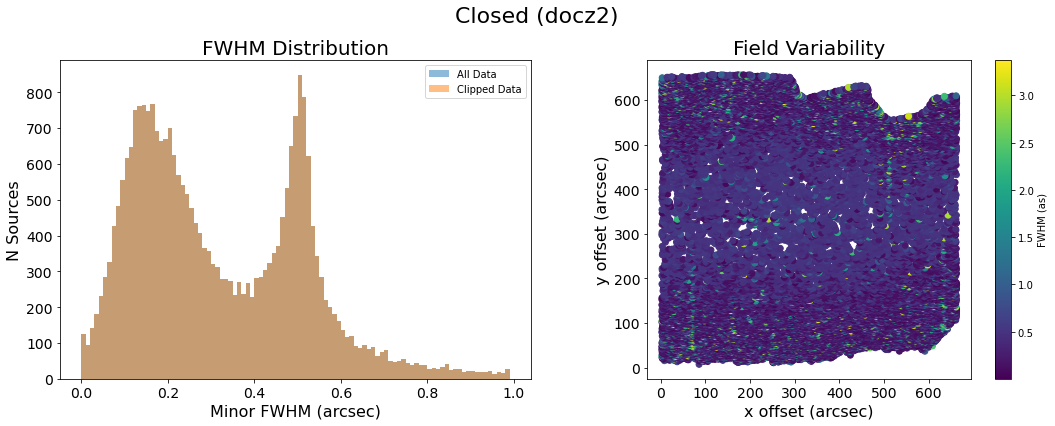

In [28]:
img_file = stack_dir + 'fld2_stack_docz2_c.fits' 
starlist = stack_dir + 'fld2_stack_docz2_c_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, "Closed (docz2)")